<a href="https://colab.research.google.com/github/Mr-Prathmesh/Indian-Demographics-Analysis/blob/main/Indian_Demographics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries (if not pre-installed)
!pip install pandas numpy matplotlib seaborn plotly geopandas

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [2]:
# Sample data (replace with real data)
data = {
    "State": ["Maharashtra", "Uttar Pradesh", "Bihar", "West Bengal", "Tamil Nadu"],
    "Population (2021)": [126000000, 240000000, 124000000, 98000000, 81000000],
    "Male_Literacy (%)": [89, 75, 70, 82, 87],
    "Female_Literacy (%)": [78, 65, 50, 71, 80],
    "Per_Capita_Income (₹)": [180000, 65000, 45000, 95000, 150000]
}

df = pd.DataFrame(data)
print(df.head())

           State  Population (2021)  Male_Literacy (%)  Female_Literacy (%)  \
0    Maharashtra          126000000                 89                   78   
1  Uttar Pradesh          240000000                 75                   65   
2          Bihar          124000000                 70                   50   
3    West Bengal           98000000                 82                   71   
4     Tamil Nadu           81000000                 87                   80   

   Per_Capita_Income (₹)  
0                 180000  
1                  65000  
2                  45000  
3                  95000  
4                 150000  


In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values (if any)
df = df.dropna()  # or .fillna(value)

State                    0
Population (2021)        0
Male_Literacy (%)        0
Female_Literacy (%)      0
Per_Capita_Income (₹)    0
dtype: int64


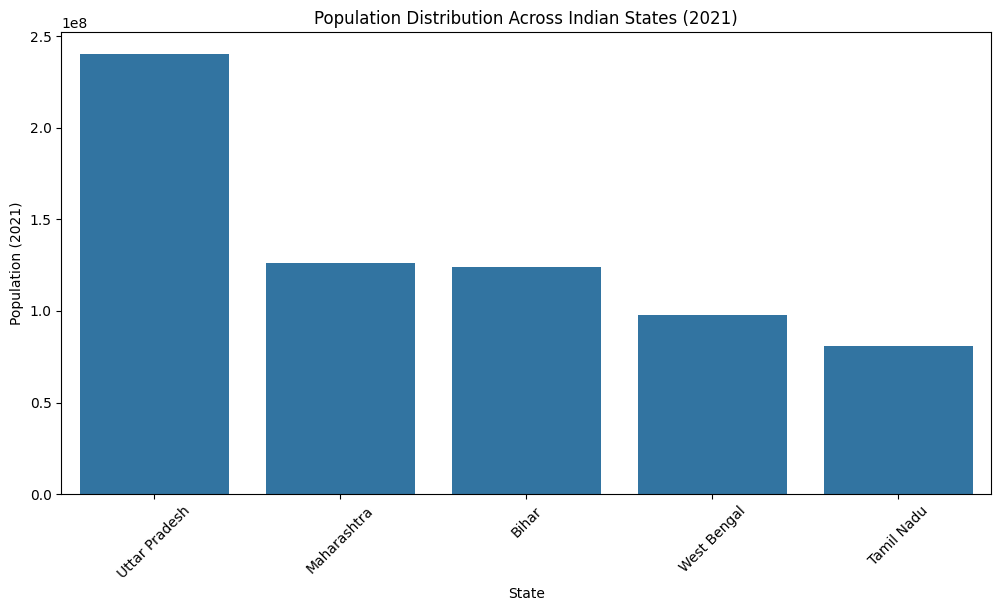

In [4]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Population (2021)', data=df.sort_values('Population (2021)', ascending=False))
plt.title("Population Distribution Across Indian States (2021)")
plt.xticks(rotation=45)
plt.show()

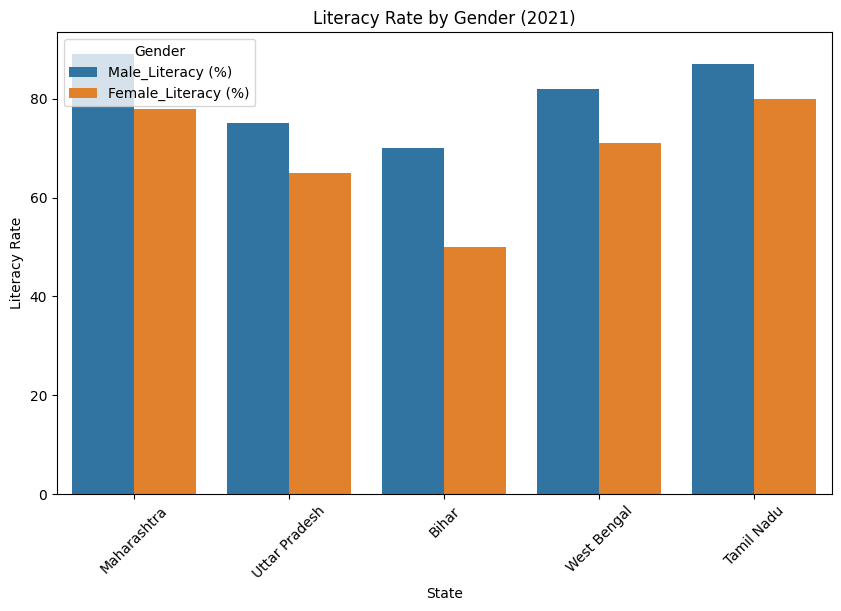

In [5]:
df_melt = df.melt(id_vars='State', value_vars=['Male_Literacy (%)', 'Female_Literacy (%)'],
                 var_name='Gender', value_name='Literacy Rate')

plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Literacy Rate', hue='Gender', data=df_melt)
plt.title("Literacy Rate by Gender (2021)")
plt.xticks(rotation=45)
plt.show()

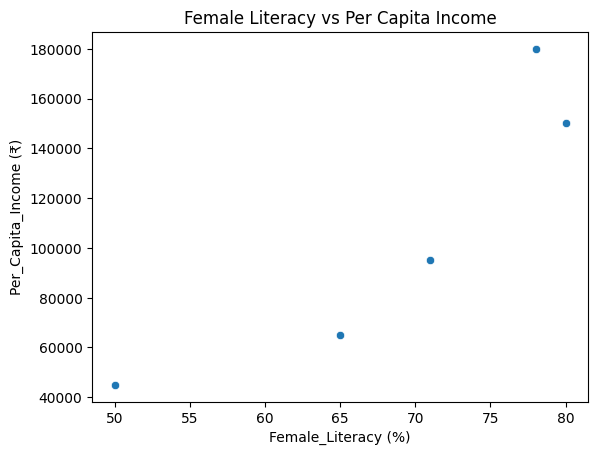

Correlation between Female Literacy & Income: 0.89


In [6]:
sns.scatterplot(x='Female_Literacy (%)', y='Per_Capita_Income (₹)', data=df)
plt.title("Female Literacy vs Per Capita Income")
plt.show()

# Correlation coefficient
corr = df['Female_Literacy (%)'].corr(df['Per_Capita_Income (₹)'])
print(f"Correlation between Female Literacy & Income: {corr:.2f}")

In [7]:
!wget https://raw.githubusercontent.com/geohacker/india/master/state/india_state.geojson
india_geojson = "india_state.geojson"

--2025-05-10 19:51:34--  https://raw.githubusercontent.com/geohacker/india/master/state/india_state.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22967643 (22M) [text/plain]
Saving to: ‘india_state.geojson’

india_state.geojson 100%[===================>]  21.90M   145MB/s    in 0.2s    

2025-05-10 19:51:34 (145 MB/s) - ‘india_state.geojson’ saved [22967643/22967643]



In [8]:
fig = px.choropleth(
    df,
    geojson=india_geojson,
    locations='State',
    featureidkey="properties.NAME_1",  # Check GeoJSON keys
    color='Female_Literacy (%)',
    hover_name='State',
    title="Female Literacy Rate in India (2021)"
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()